# 一、柱形图
## 1.概述：
柱形图（Bar Chart）是一种常用的可视化工具，主要用于显示类别数据之间的比较。它通过一系列高度不同的矩形条来表示数据的大小，条的高度或长度与所表示的数值成正比。柱形图既可以是垂直的（称为柱状图），也可以是水平的（称为条形图）。
目前在各种统计图形中柱形图应用的最为广泛，但柱状图所能展示的统计量比较贫乏：它只能以矩形条的长度展示原始数值，对数据没有任何概括或推断。


* 背景：柱形图的概念可以追溯到18世纪末，统计学家威廉·普雷费尔（William Playfair）发明了这种图表形式。他将其用于呈现不同类别之间的数量对比，最早的应用之一是比较国家的收入与支出。


* 用途：
柱形图的主要用途包括：
    1. 类别数据比较：用于比较不同类别或群体之间的数值差异，例如不同地区的销售额、不同年份的市场份额等。
    2. 趋势分析：当时间轴作为 x 轴时，可以展示各类别随时间的变化趋势。
    3. 显示数据的分布：通过分组柱形图展示不同组别数据的分布情况。
    4. 部分与整体的关系：堆积柱形图可以显示各部分相对于整体的贡献。

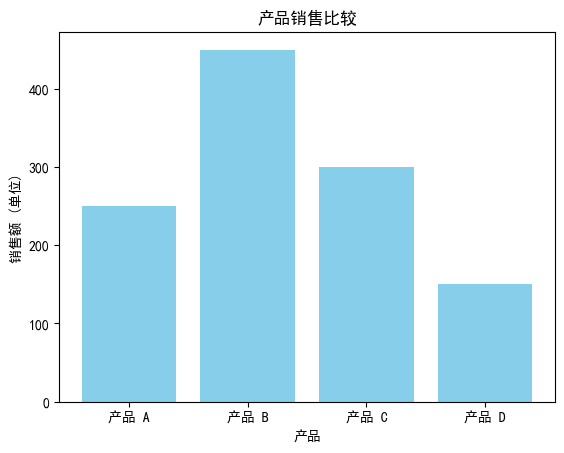

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

# 类别和对应的销售数据
products = ['产品 A', '产品 B', '产品 C', '产品 D']
sales = [250, 450, 300, 150]

# 创建柱形图
plt.bar(products, sales, color='skyblue')

# 添加标签和标题
plt.xlabel('产品')
plt.ylabel('销售额 (单位)')
plt.title('产品销售比较')

# 显示图表
plt.show()


上图为各产品的类别数据比较的柱形图，展示了各产品销售额之间的差异

* 适用场景
    1. 展示有限的类别：当需要比较少数几个类别的数值时，柱形图非常适合。如果类别过多，图表会显得杂乱，柱形图不再适用。
    2. 强调差异：柱形图直观地展示了各类别之间的数值差异，非常适合需要突出差异的场合。
    3. 时间序列数据：尽管折线图通常用于时间序列分析，但当有离散的时间点时，柱形图也可以有效地展示随时间的变化情况。
    4. 数据分类展示：比如统计不同产品销量、用户类别分布、业务领域的市场占比等。

## 2.示例

In [2]:
import pandas as pd
df = pd.read_csv("Health_Sleep_Statistics.csv")
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


这里以kaggle上的健康和睡眠统计（包含有关个人睡眠习惯和身体活动的各种信息）数据集为例，介绍条形图。

In [3]:
bins = range(20, 51, 5)  # 年龄范围从20到50，每组5年
age_groups = pd.cut(df['Age'], bins=bins, right=False)

# 按年龄段和性别分组计算平均睡眠质量，并保留一位小数
grouped_df = df.groupby([age_groups, 'Gender'])['Sleep Quality'].mean().unstack().round(1)
for age_group in grouped_df.index:
    if pd.isna(grouped_df.loc[age_group, 'm']):  # 如果男性数据缺失
        grouped_df.loc[age_group, 'm'] = grouped_df.loc[age_group, 'f']  
    if pd.isna(grouped_df.loc[age_group, 'f']):  # 如果女性数据缺失
        grouped_df.loc[age_group, 'f'] = grouped_df.loc[age_group, 'm']  

grouped_df = grouped_df.round(1)
grouped_df

C:\Users\qinglan\AppData\Local\Temp\ipykernel_31288\1547542591.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby([age_groups, 'Gender'])['Sleep Quality'].mean().unstack().round(1)


Gender,f,m
Age,,
"[20, 25)",8.8,9.0
"[25, 30)",8.7,8.7
"[30, 35)",8.2,6.7
"[35, 40)",8.0,6.2
"[40, 45)",9.0,5.5
"[45, 50)",5.0,5.0


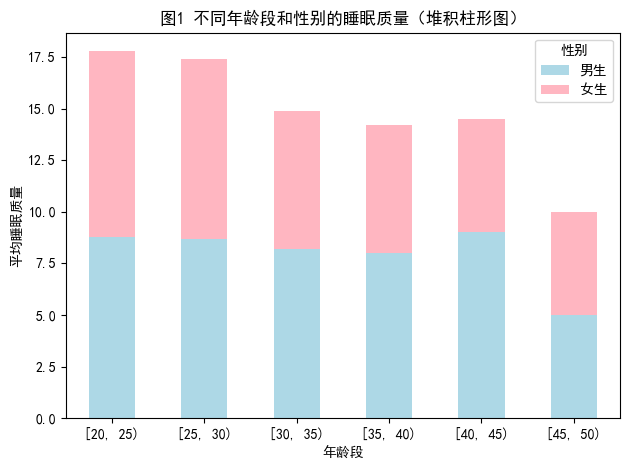

In [4]:
# 绘制堆积柱形图
grouped_df.plot(kind='bar', stacked=True, color=['lightblue', 'lightpink'])

# 添加标签和标题
plt.xlabel('年龄段')
plt.ylabel('平均睡眠质量')
plt.title('图1 不同年龄段和性别的睡眠质量（堆积柱形图）')

# 显示图表
plt.legend(title='性别', labels=['男生', '女生'])
plt.xticks(rotation=0)  # 使 x 轴标签水平显示
plt.tight_layout()

# 展示图表
plt.show()


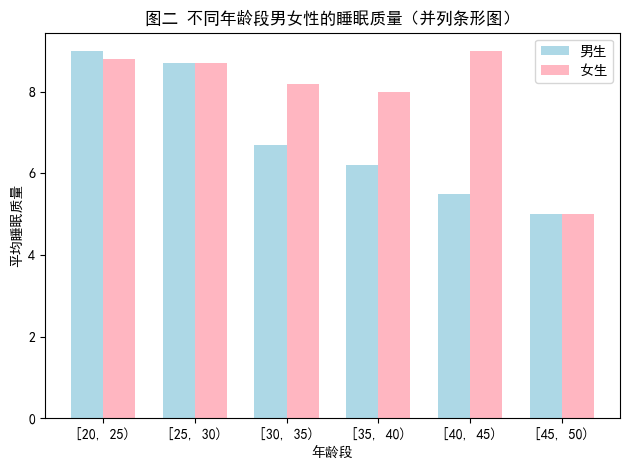

In [5]:
import numpy as np

bar_width = 0.35  # 每个条形的宽度
index = np.arange(len(grouped_df))  # x 轴的索引

fig, ax = plt.subplots()
bar1 = ax.bar(index, grouped_df['m'], bar_width, label='男生', color='lightblue')
bar2 = ax.bar(index + bar_width, grouped_df['f'], bar_width, label='女生', color='lightpink')

ax.set_xlabel('年龄段')
ax.set_ylabel('平均睡眠质量')
ax.set_title('图二 不同年龄段男女性的睡眠质量（并列条形图）')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped_df.index.astype(str), rotation=0)  
ax.legend()

plt.tight_layout()
plt.show()

以上两图中展示了各年龄组之间睡眠质量的差异。其中，堆砌的条形图容易比较各年龄组总睡眠质量的高低。显然年龄越大，睡眠质量越低。而并列的条形图容易比较组内的性别差异。一般来说女性高于男性。相较比例，人眼对于长度更敏感，因此我们制图时要考虑清楚展示的数据的哪一方面，将最关键的信息用最能激发视觉感知的形式表现出来。

## 3.绘制方法
在 Python 中，绘制条形图可以使用多个可视化库，如 matplotlib、seaborn 和 plotly。以下是使用这些库绘制基本条形图的示例，并说明其作图方法和参数。
1. 使用matplotlib
matplotlib 是 Python 中最基础的绘图库。它提供了非常灵活的作图功能。代码语法示例如下：

In [6]:
import matplotlib.pyplot as plt

plt.bar(x, height, width=0.8, bottom=None, align='center', color=None, edgecolor=None, linewidth=None, tick_label=None, log=False)

NameError: name 'x' is not defined

常用参数说明：
* x：条形图的 x 轴位置（类别或数值序列）。
* height：每个条形的高度（即 y 轴值）。
* width：控制条形的宽度，默认为 0.8。
* bottom：设置条形的底部位置，默认为 0，适用于堆积条形图。
* align：条形对齐方式，'center' 或 'edge'。默认居中对齐。
* color：条形的颜色，可以是单个颜色或颜色序列。
* edgecolor：条形边缘颜色。
* linewidth：条形边缘线的宽度。
* tick_label：自定义 x 轴刻度标签。
* log：将 y 轴设置为对数刻度，True 或 False。

示例：

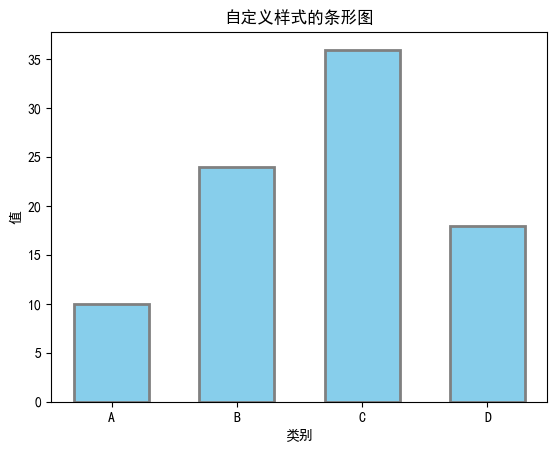

In [7]:
categories = ['A', 'B', 'C', 'D']
values = [10, 24, 36, 18]
plt.bar(categories, values, width=0.6, color='skyblue', edgecolor='gray', linewidth=2)
plt.xlabel('类别')
plt.ylabel('值')
plt.title('自定义样式的条形图')
plt.show()

2. seaborn.barplot()

seaborn 的 barplot() 函数不仅可以绘制条形图，还支持显示误差条（confidence intervals）。代码语法示例如下：

In [ ]:
sns.barplot(x=None, y=None, hue=None, data=None, order=None, ci=95, palette=None, saturation=0.75, dodge=True, ax=None, orient=None)

常用参数说明：
* x：x 轴数据列的名称。
* y：y 轴数据列的名称。
* hue：根据另一列数据对条形图进行分组（用于绘制不同类别的条形）。
* data：pandas DataFrame 格式的数据。
* order：控制 x 轴类别显示顺序。
* ci：显示置信区间，默认为 95，可以设置为 None 取消显示。
* palette：指定条形图的颜色调色板，支持各种调色板风格，如 'Blues'、'Set2'。
* saturation：颜色的饱和度，取值范围 0 到 1，默认为 0.75。
* dodge：是否对 hue 的条形图进行并列显示（True），还是堆叠显示（False）。
* orient：条形图的方向，'v' 表示垂直，'h' 表示水平。

示例：

C:\Users\qinglan\AppData\Local\Temp\ipykernel_31288\4264351766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='Blues')


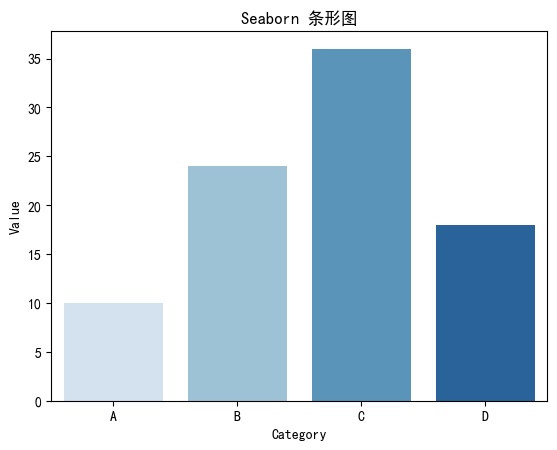

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 数据
data = {'Category': ['A', 'B', 'C', 'D'], 'Value': [10, 24, 36, 18]}
df = pd.DataFrame(data)

# 绘制条形图
sns.barplot(x='Category', y='Value', data=df, palette='Blues')

# 添加标题
plt.title('Seaborn 条形图')
# 显示图表
plt.show()


3. plotly.express.bar()

plotly 的 bar() 函数生成交互式条形图，支持高级功能如分组、堆叠、颜色映射等。代码语法示例如下：

In [ ]:
px.bar(data_frame, x=None, y=None, color=None, barmode='relative', facet_row=None, facet_col=None, text=None, hover_name=None, hover_data=None, animation_frame=None, animation_group=None, range_x=None, range_y=None, labels=None, title=None, template=None)

常用参数说明：
* data_frame：输入的数据集，通常为 pandas DataFrame。
* color：根据某列的数据进行颜色映射（分组或渐变）。
* barmode：条形图模式，'group'（并列）或 'stack'（堆叠），默认为 'relative'（堆叠）。
* facet_row 和 facet_col：分别在行和列中按某列数据拆分多个图。
* text：在条形图上显示每个条的数值。
* hover_name：鼠标悬停时显示的列名。
* hover_data：鼠标悬停时显示的附加信息。
* animation_frame 和 animation_group：用于生成动画条形图，按帧变化。
* range_x 和 range_y：设置 x 和 y 轴的范围。
* labels：自定义图表中各列的名称。
* title：设置图表的标题。

示例：

In [9]:
import plotly.express as px

# 数据
data = {'Category': ['A', 'B', 'C', 'D'], 'Value': [10, 24, 36, 18]}
df = pd.DataFrame(data)

# 绘制条形图
fig = px.bar(df, x='Category', y='Value', color='Category', title='Plotly 条形图')

# 显示图表
fig.show()
